In [1]:
import datetime
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
def linear_regression_equation(index,a_close):
    denominator = index.dot(index) - index.mean()*index.sum()
    m = ((a_close.dot(index)) - a_close.mean() * index.sum()) / denominator
    b = ((a_close.mean() * index.dot(index)) - (index.mean() * a_close.dot(index)))/denominator
    y_pred = m*index + b
    return y_pred

def rsquared(y_pred,a_close):
         res = a_close - y_pred
         tot = a_close - a_close.mean()
         rsquared = 1 - (res.dot(res)/tot.dot(tot))
         return rsquared

In [3]:
data = pd.read_csv('AAPL.csv') #import data

In [4]:
data.head() #check the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,78.292503,79.125000,77.580002,78.739998,78.212997,135178400
1,2020-05-19,78.757500,79.629997,78.252502,78.285004,77.761040,101729600
2,2020-05-20,79.169998,79.879997,79.129997,79.807503,79.273354,111504800
3,2020-05-21,79.665001,80.222504,78.967499,79.212502,78.682327,102688800
4,2020-05-22,78.942497,79.807503,78.837502,79.722504,79.188927,81803200


In [5]:
data['Index'] = range(0,data['Adj Close'].size)

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Index
0,2020-05-18,78.292503,79.125000,77.580002,78.739998,78.212997,135178400,0
1,2020-05-19,78.757500,79.629997,78.252502,78.285004,77.761040,101729600,1
2,2020-05-20,79.169998,79.879997,79.129997,79.807503,79.273354,111504800,2
3,2020-05-21,79.665001,80.222504,78.967499,79.212502,78.682327,102688800,3
4,2020-05-22,78.942497,79.807503,78.837502,79.722504,79.188927,81803200,4


In [7]:
new_data = data['Index'] + data['Adj Close']

In [8]:
frame = { 'Index': data['Index'], 'Adj Close': data['Adj Close'] } 
  
new_data = pd.DataFrame(frame) 

In [9]:
new_data.head()

,Index,Adj Close
0,0,78.212997
1,1,77.761040
2,2,79.273354
3,3,78.682327
4,4,79.188927


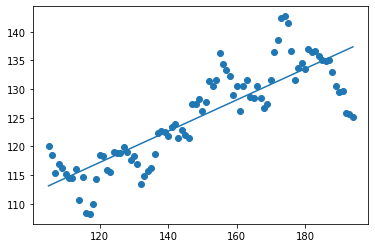

In [12]:
sliding_window = 0

for i in range(20,new_data['Index'].size):
        adjustable = int(new_data['Index'][-1:] - i)
        k = adjustable - 90
        k2 =  new_data[['Index' ,'Adj Close']].query('Index > @k and Index <= @adjustable')
        Index_array = np.array(k2['Index'])
        aclose_array = np.array(k2['Adj Close'])
        linreg = linear_regression_equation(Index_array,aclose_array)
        rsquared_value = float(rsquared(linreg,aclose_array))
        if rsquared_value > 0.7:
            plt.scatter(Index_array,aclose_array)
            plt.plot(Index_array,linreg)
            break
        else:
            sliding_window = sliding_window+1